# Student Performance Indicator
## Life cycle of Machine learning Project
- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model
## 1) Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.
## 2) Data Collection
Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
The data consists of 8 column and 1000 rows.
### 2.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Import the CSV Data as Pandas Dataframe

In [16]:
df =pd.read_csv('data/stud.csv')

In [17]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [18]:
df.shape

(1000, 8)

In [19]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [20]:
df['race_ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [21]:
df['parental_level_of_education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [22]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [23]:
df['test_preparation_course'].unique()

array(['none', 'completed'], dtype=object)

## 2.2 Dataset Information

- gender: 
    - male and female
- groups:
    - A,B,C,D,E (5 groups)
- parental level of education:
    - bachelor's degree
    -  master’s degree
    - some college
    - associate's degree
    - high school
- lunch: having lunch before test
    - standard
    - free/reduced
- test preparation course
    - complete or not compete before test
- math score
- reading score
- writing score

# Data checks to perform
- Check missing values
- Check duplicates
- Check data types
- Check the number of unique values in each column
- Check statistics of dataset
- Define numerical and categorical columns

## 3.1 Check missing values

In [24]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values in the data

## 3.2 Check duplicates

In [25]:
df.duplicated().sum()

0

There are no duplicates in the dataset

## 3.3 Check datatypes

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## 3.4 Checking the number of unique values in each column

In [27]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

## 3.5 Check statistics of the dataset

In [28]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [51]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [52]:
df['parental_level_of_education'].value_counts()

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

### Insights:
- All means are close to each other - between 66.08 and 69.16.
- All standard deviations are close to each other - between 14.6 to 14.19.
- The minimum score for maths is 0, writing is 10 and reading is 17.

## 3.6 Define numerical and categorical columns

In [29]:
numeric_features = [col for col in df.columns if df[col].dtypes != 'O']
categorical_features = [col for col in df.columns if df[col].dtypes == 'O']

# print columns
print("We have {} numeric features: {} ".format(len(numeric_features), numeric_features))
print("We have {} categorical features: {} ".format(len(categorical_features), categorical_features))

We have 3 numeric features: ['math_score', 'reading_score', 'writing_score'] 
We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course'] 


## 3.7 Adding columns for feature score and column score

In [30]:
df['total_score']= df['math_score'] + df['reading_score'] + df['writing_score']
df['average']= df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [31]:
reading_full = df[df['reading_score']==100]['average'].count()
writing_full = df[df['writing_score']==100]['average'].count()
math_full = df[df['math_score']==100]['average'].count()

# print statement
print(f'Number of students who score 100 in math: {math_full}')
print(f'Number of students who score 100 in writing: {writing_full}')
print(f'Number of students who score 100 in reading: {reading_full}')

Number of students who score 100 in math: 7
Number of students who score 100 in writing: 14
Number of students who score 100 in reading: 17


In [32]:
reading_less_20 = df[df['reading_score']<=20]['average'].count()
writing_less_20 = df[df['writing_score']<=20]['average'].count()
math_less_20 = df[df['math_score']<=20]['average'].count()

# print statement
print(f'Number of students who score 100 in math: {math_less_20}')
print(f'Number of students who score 100 in writing: {writing_less_20}')
print(f'Number of students who score 100 in reading: {reading_less_20}')

Number of students who score 100 in math: 4
Number of students who score 100 in writing: 3
Number of students who score 100 in reading: 1


### Insights
- The students have performed worst in maths
- The students had the best performance in reading section

# 4. Visualization
## 4.1. visualize average score distribution to make some conclusion.

- Histogram
- Kernal distribution function (KDE)

### 4.1.1. Histogram & KDE
#### effect of gender on students performance

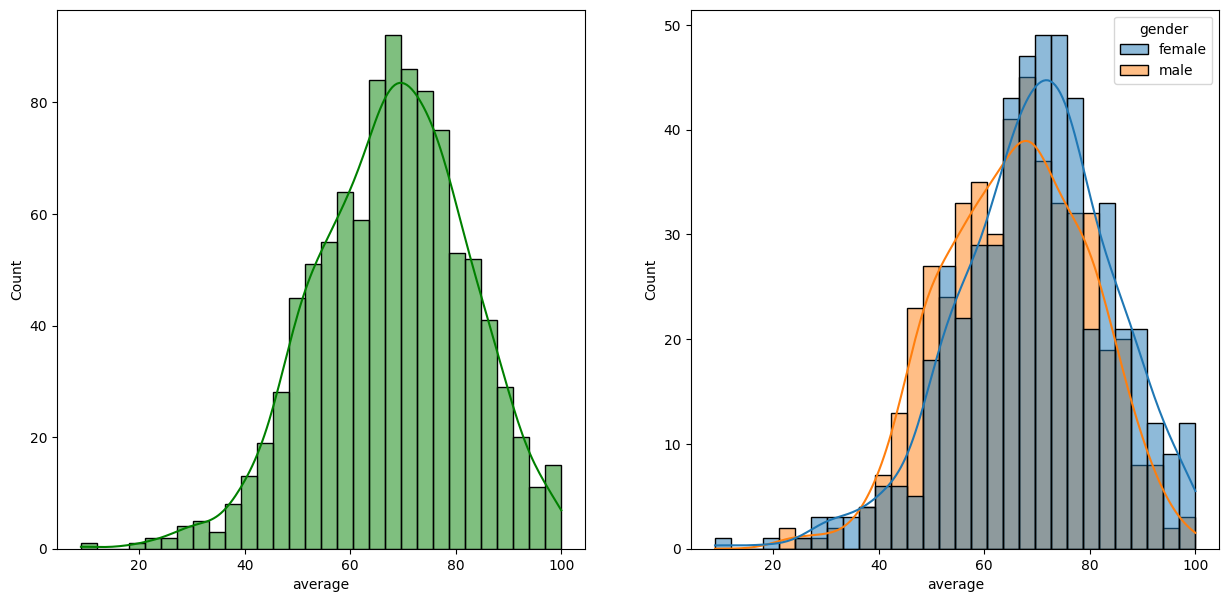

In [37]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30,kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', bins=30,kde=True, hue='gender')
plt.show()

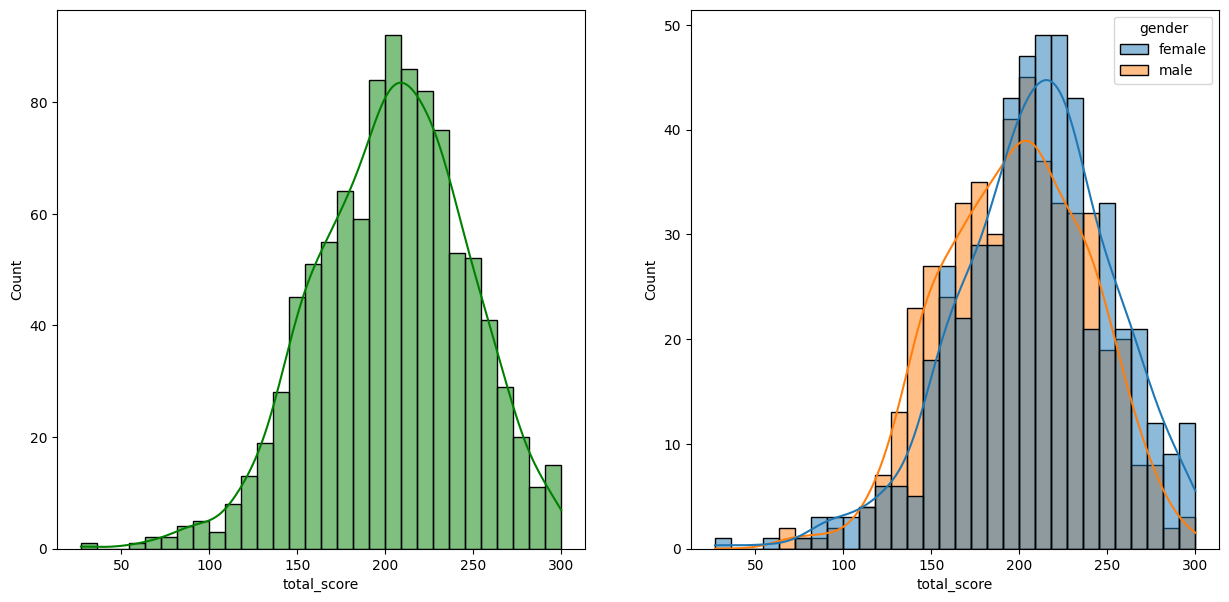

In [38]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='total_score', bins=30,kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='total_score', bins=30,kde=True, hue='gender')
plt.show()

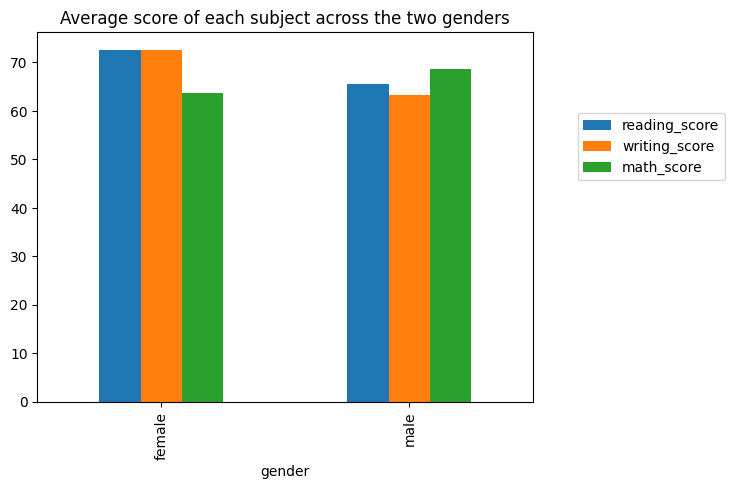

In [53]:
df.groupby("gender")[["reading_score","writing_score","math_score"]].mean().plot(kind="bar",)
plt.legend(bbox_to_anchor=(1.4,0.8))
plt.title("Average score of each subject across the two genders")
plt.show()

#### insights
- female students tend to perform well than male students.
- Females have higher scores than males in reading and writing whereas males score higher in mathematics.

### effect of lunch on marks

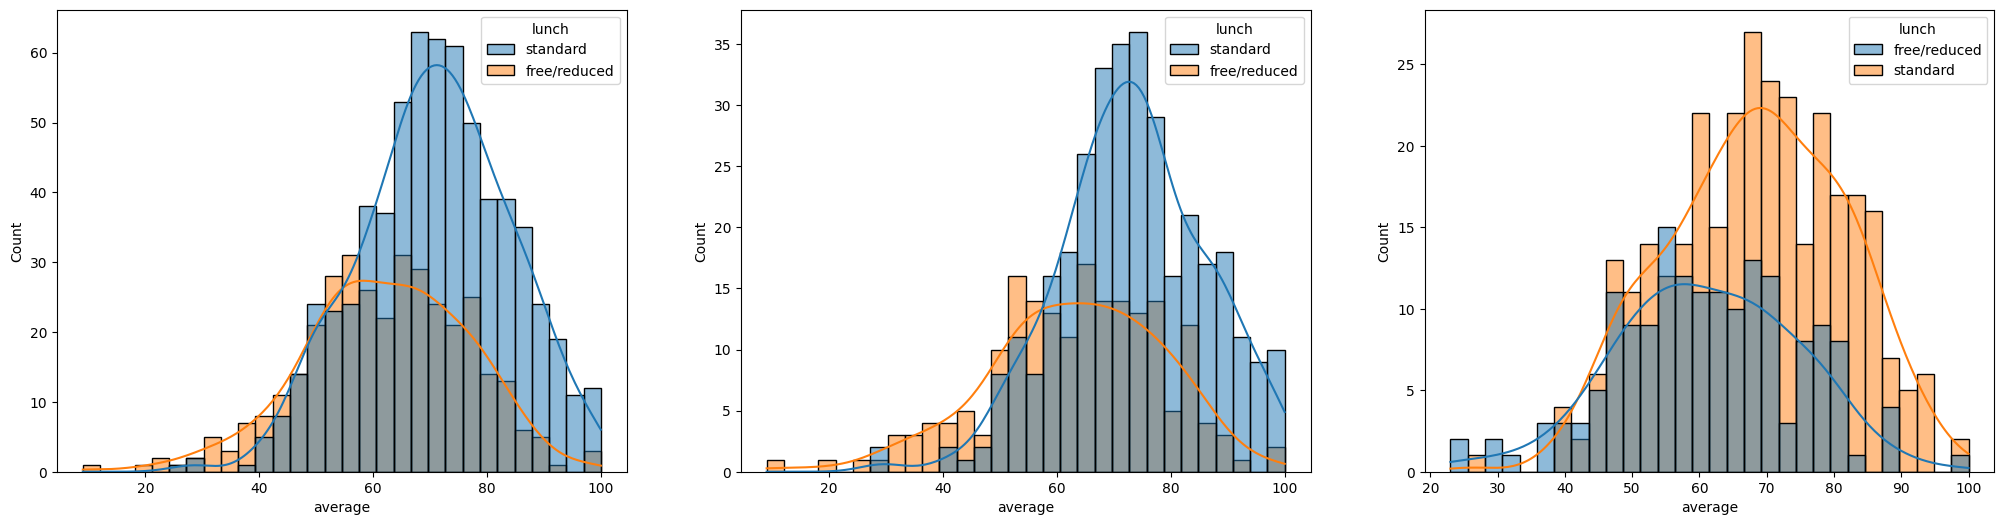

In [43]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x='average', bins=30,kde=True, hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='average', bins=30,kde=True, hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='average', bins=30,kde=True, hue='lunch')
plt.show()

#### insights:
- Standard lunch helps the students, be it males or females, to perform well in exams.

### effect of parental level of education on students' marks

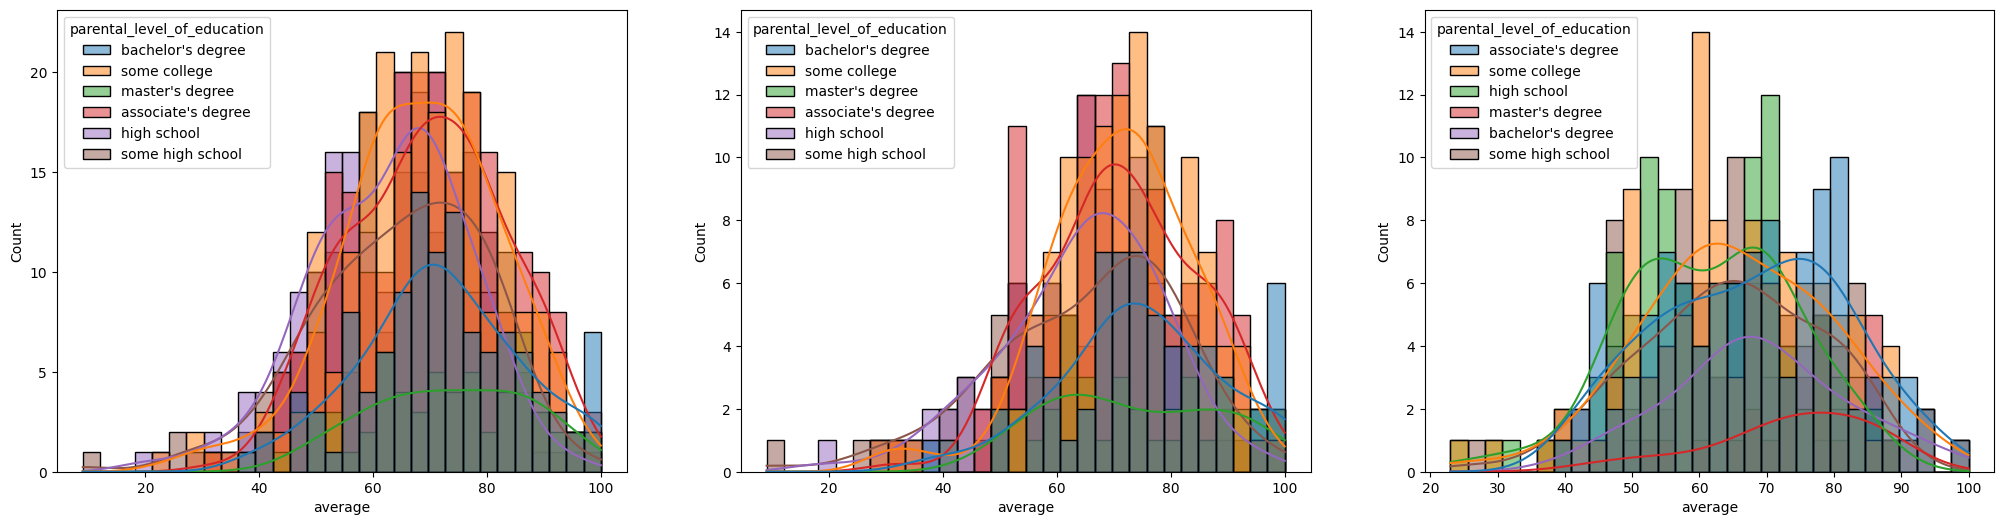

In [45]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x='average', bins=30,kde=True, hue='parental_level_of_education')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='average', bins=30,kde=True, hue='parental_level_of_education')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='average', bins=30,kde=True, hue='parental_level_of_education')
plt.show()

- in general parents' education don't help students perform well in exam.

#### effect of race/ethnicity

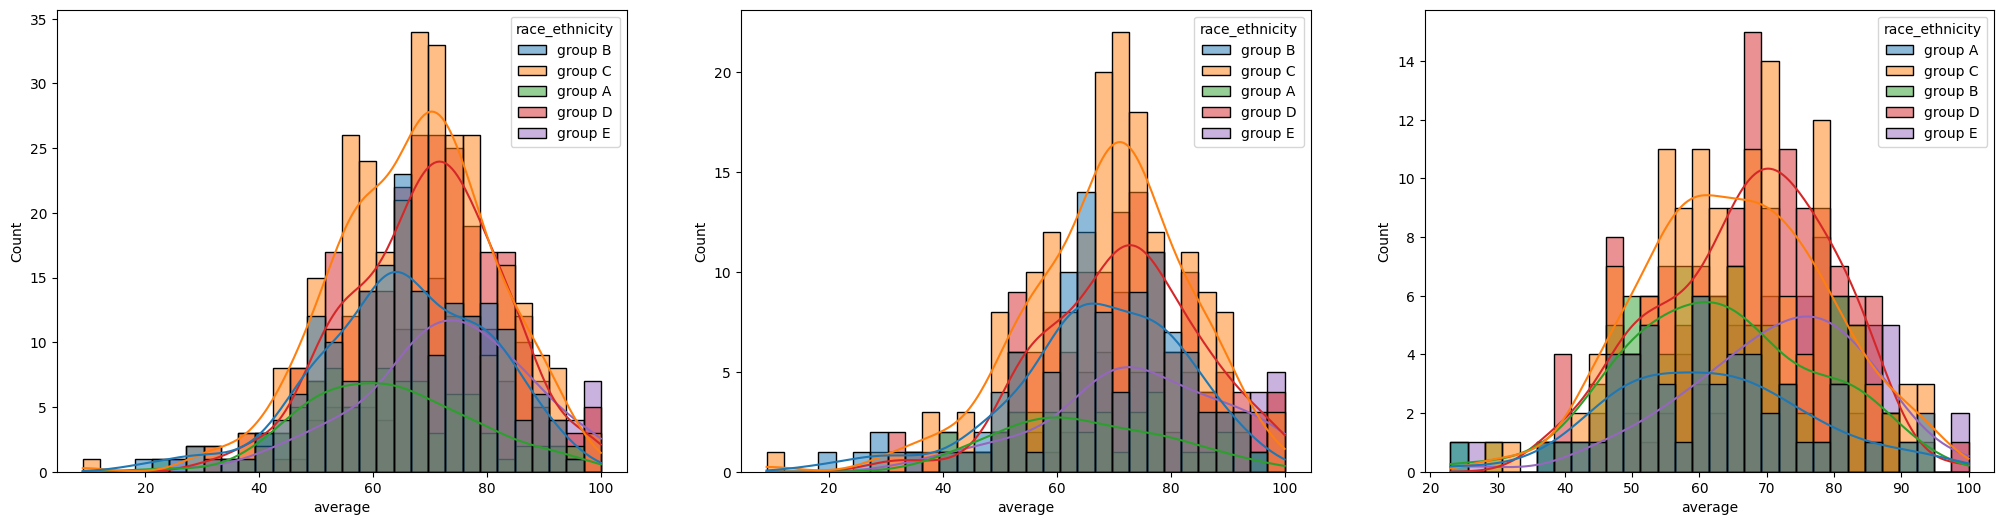

In [56]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x='average', bins=30,kde=True, hue='race_ethnicity')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='average', bins=30,kde=True, hue='race_ethnicity')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='average', bins=30,kde=True, hue='race_ethnicity')
plt.show()

- students of group A and B, be it male or female,perform poorly in  exams.


#### effect of test preparation course on performance

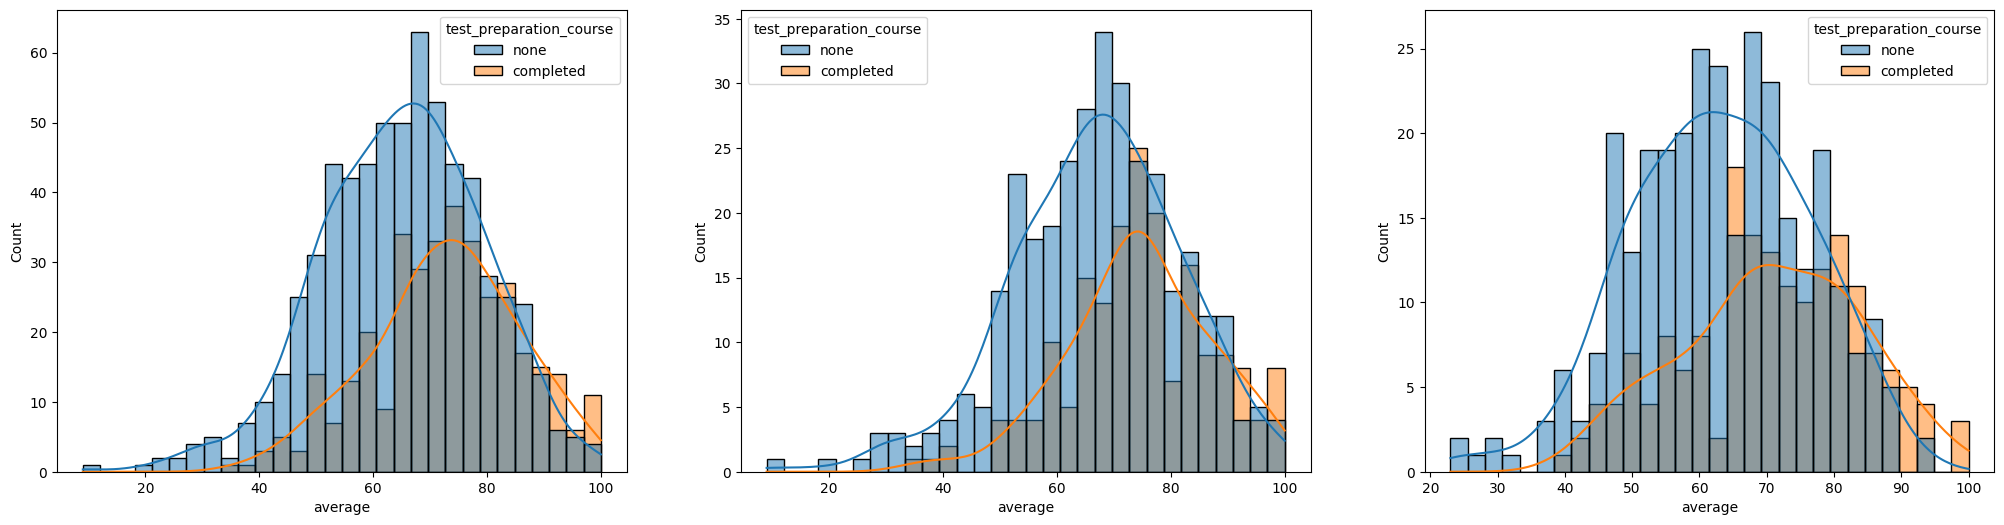

In [58]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x='average', bins=30,kde=True, hue='test_preparation_course')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='average', bins=30,kde=True, hue='test_preparation_course')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='average', bins=30,kde=True, hue='test_preparation_course')
plt.show()

Students who have completed the test preparation course score higher than those who have not taken the course.